In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


<img src= "https://media.istockphoto.com/id/643956812/photo/sales-imporvement.jpg?s=612x612&w=0&k=20&c=BERc0TihWU4sZpzSTBsJpQ6em2wowpYCtHA0Iwbl7QM=" alt ="sales" style='width: 700px;'>

# Table of Content
* import dataset
* cleaning 
* transforming
* eda 
* train test split
* scaling 
* model training
* * accuracy

In [2]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

# import dataset

In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [18]:
df.shape

(200, 4)

# cleaning

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [8]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# transforming

In [9]:
df['TV']=df['TV'].astype('int')

In [10]:
df['Radio']=df['Radio'].astype('int')

In [11]:
df['Newspaper']=df['Newspaper'].astype('int')

In [12]:
df['Sales']=df['Sales'].astype('int')

In [13]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12
5,8,48,75,7
6,57,32,23,11
7,120,19,11,13
8,8,2,1,4
9,199,2,21,10


In [14]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TV', ylabel='Radio'>

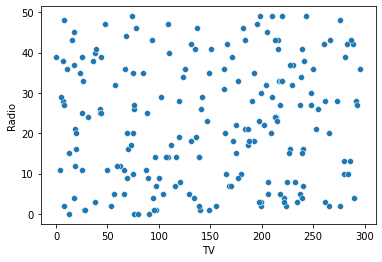

In [33]:
sns.scatterplot(df['TV'],df['Radio'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TV', ylabel='Sales'>

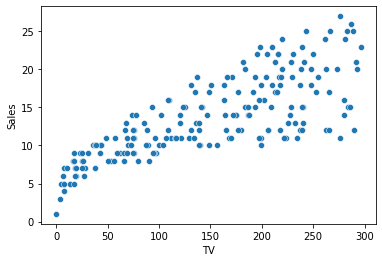

In [34]:
sns.scatterplot(df['TV'],df['Sales'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

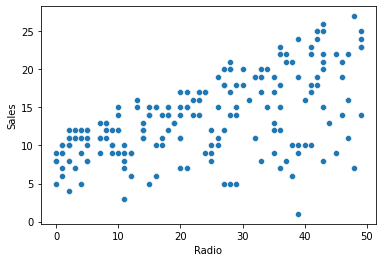

In [35]:
sns.scatterplot(df['Radio'],df['Sales'])

In [16]:
x=df.iloc[:,0:-1]

In [17]:
y=df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

# train test split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
Sc=StandardScaler()

# scaling

In [23]:
x_train_scaled=Sc.fit_transform(x_train)

In [24]:
x_test_scaled=Sc.fit_transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

# model training

In [27]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(x_test_scaled)

In [29]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.8811836354878553

# got 88.12 % accuracy 